In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [77]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_1/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_1/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


In [78]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Output':1.36e-134}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.75,0.6,1.84506867231124E-12]
df.loc[len(df)] = new_data

new_data=[0.05,0.95,4.406064392151E-291]
df.loc[len(df)] = new_data


# 10 may
new_data=[0.6,0.6,0.0255592853398297]
df.loc[len(df)] = new_data

new_data=[0.99,0.99,5.3094306962609E-183]
df.loc[len(df)] = new_data

new_data=[0.99,0.01,0]
df.loc[len(df)] = new_data

#17 may
df.loc[len(df)]=[0.434343,0.454545,0.028354367256360813]

#19 MAY
df.loc[len(df)]=[0.676768,0.05,3.1259374105081E-142]
df.loc[len(df)]=[0.050001,0.565656,-2.7013862960671E-111]

#2 jun
df.loc[len(df)]=[0.484849,0.484849,1.75981312307345E-06]

#10 jun
df.loc[len(df)]=[0.489179,0.502706,0.0000000152]
df.loc[len(df)]=[0.649999,0.400001,-4.59E-37]

#10 jun
df.loc[len(df)]=[0.40015,0.600044,1.43311345784438E-23]
df.loc[len(df)]=[0.394553,0.480802,-0.000383029826414517]

#Print
df


,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


In [54]:
activar=0 # 1 es YES

if activar==1:
    # Define the small constant epsilon
    epsilon = 1e-100
    # Apply the logarithmic transformation to the 'contamination_level' column
    df['transf_output'] = np.sign(df['Output'])*df['Output']**2
    df['transf_output_1000'] = df['transf_output']*1000
    df['Output']=df['transf_output_1000']

df


,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


# Function 1: Searching for Contamination Sources

### This may sound simple because you only have a two-dimensional input, however it is a very difficult problem. It corresponds to trying to find the source of radiation in some square area. However, you can only detect the radiation once you are very close to it, meaning most of the readings will be zero. There are two sources, one is not too dangerous, so make sure you try to find both modes of the function.

## Data exploration

In [23]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2         Output  transf_output  transf_output_1000
count  24.000000  24.000000   2.400000e+01   2.400000e+01        2.400000e+01
mean    0.523297   0.508121   6.017070e-02   6.017070e-05        6.017070e-02
std     0.280039   0.286359   2.070933e-01   2.070933e-04        2.070933e-01
min     0.050000   0.010000  -1.300369e-02  -1.300369e-05       -1.300369e-02
25%     0.375766   0.366184 -1.824372e-219 -1.824372e-222      -1.824372e-219
50%     0.531754   0.534181  6.504399e-159  6.504399e-162       6.504399e-159
75%     0.695320   0.694395   1.486440e-28   1.486440e-31        1.486440e-28
max     0.990000   0.990000   8.039701e-01   8.039701e-04        8.039701e-01

Missing values in the dataset:
Input_1               0
Input_2               0
Output                0
transf_output         0
transf_output_1000    0
dtype: int64


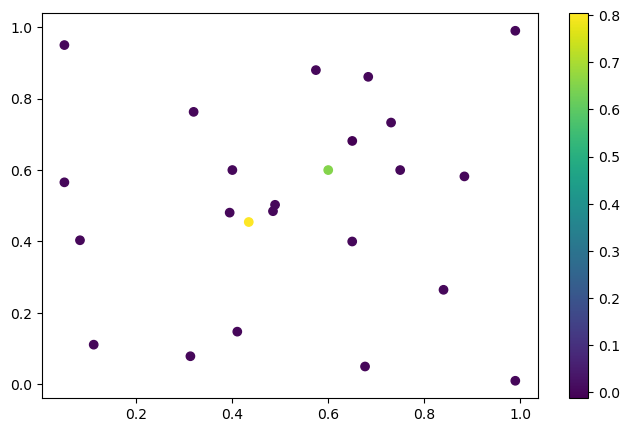

In [24]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(df['Input_1'], df['Input_2'], c = df['Output'])
plt.colorbar();

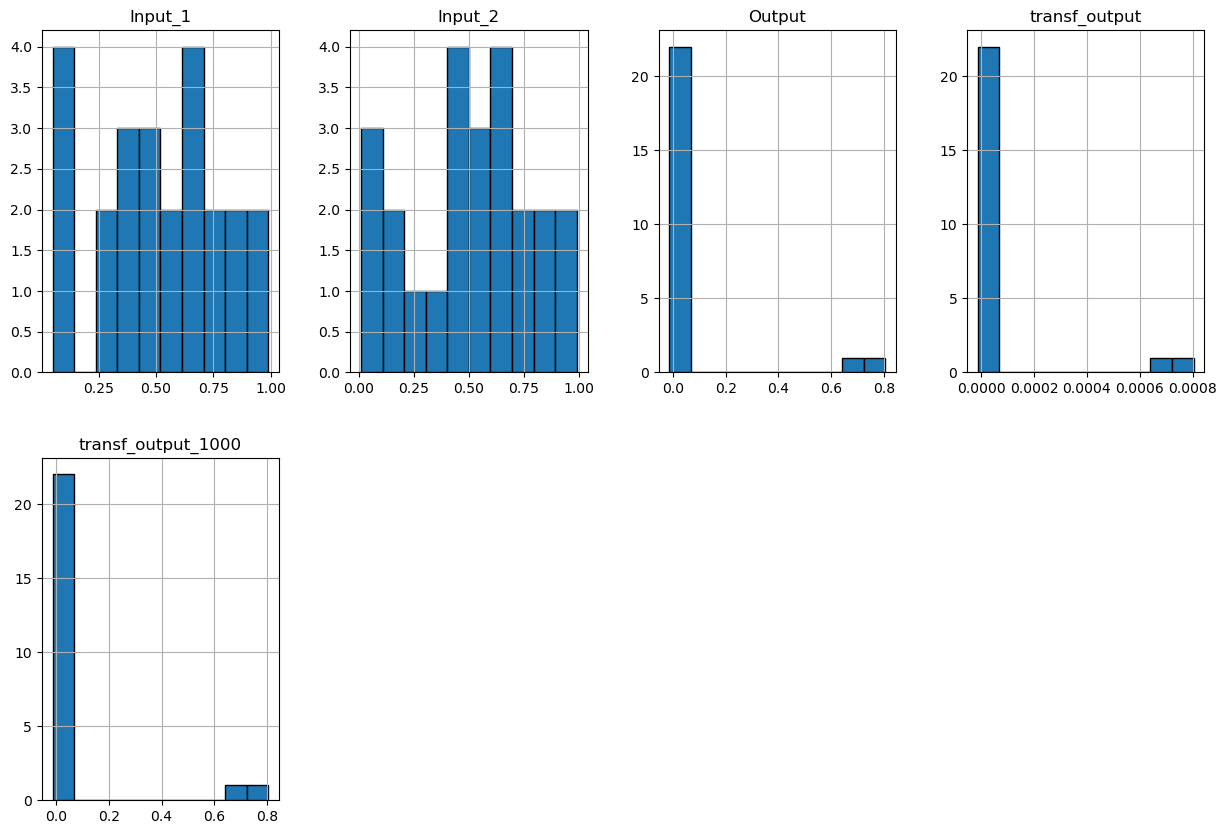

In [25]:
# Plot histograms for each column to understand distributions
df.hist(bins=10, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.25)
plt.show()

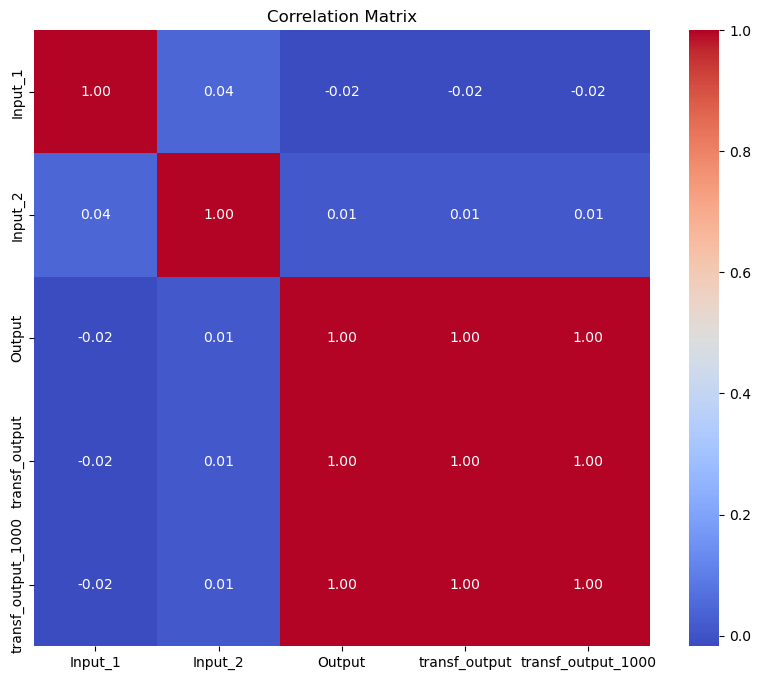

In [26]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

## FOR THIS CASE ONLY (Model 1)
### Transform the Output to explore further as this are very small contamination numbers

0    -230.258509
1    -204.864987
2     -62.689704
3    -230.258509
4      -4.342522
5    -230.258463
6    -230.258509
7    -175.438664
8    -230.258509
9    -210.481707
10   -230.258509
11    -47.129254
12   -230.258509
13     -0.425754
14   -230.258509
15   -230.258509
16     -0.218193
17   -230.258509
18   -230.258509
19    -19.592851
20    -29.096186
21   -160.435782
22    -98.291460
23     -8.827040
Name: Log_Output, dtype: float64
Basic Statistical Summary:
         Input_1    Input_2         Output  transf_output  transf_output_1000  \
count  24.000000  24.000000   2.400000e+01   2.400000e+01        2.400000e+01   
mean    0.523297   0.508121   6.017070e-02   6.017070e-05        6.017070e-02   
std     0.280039   0.286359   2.070933e-01   2.070933e-04        2.070933e-01   
min     0.050000   0.010000  -1.300369e-02  -1.300369e-05       -1.300369e-02   
25%     0.375766   0.366184 -1.824372e-219 -1.824372e-222      -1.824372e-219   
50%     0.531754   0.534181  6.504399e-159  6.

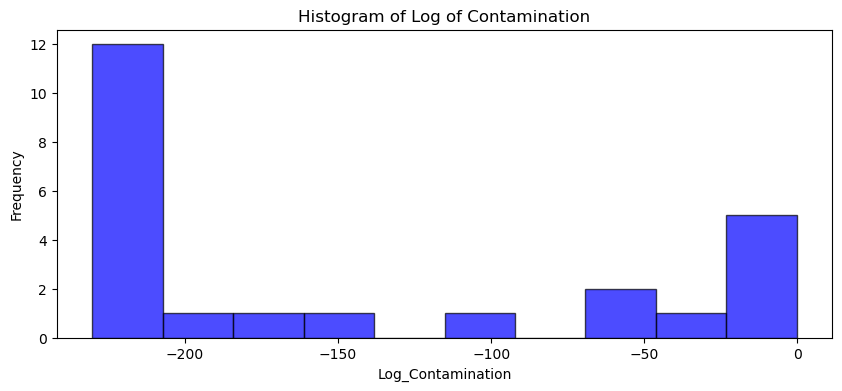

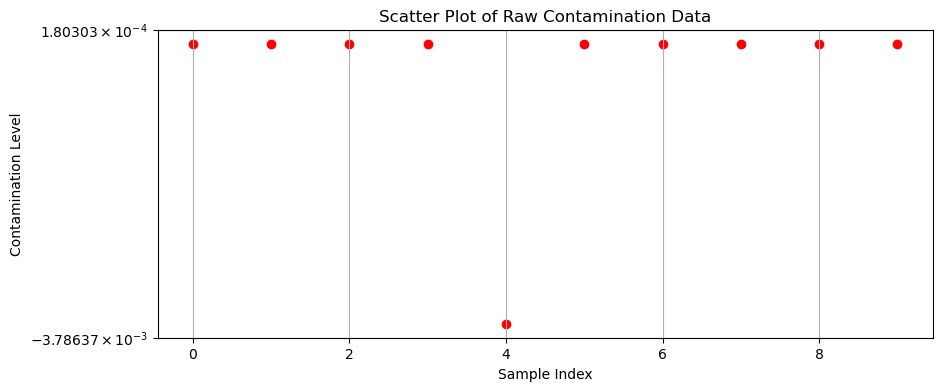

In [27]:
# Transform data: Apply a logarithmic transformation
# Small epsilon to avoid log(0) issues, assuming all values are supposed to be non-negative
epsilon = 1e-100
df['Log_Output'] = np.log(df['Output'].abs() + epsilon)
print(df['Log_Output'])

# Basic Statistics
print("Basic Statistical Summary:")
print(df.describe())

# Histograms to explore each variable
plt.figure(figsize=(10, 4))
plt.hist(df['Log_Output'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Log of Contamination')
plt.xlabel('Log_Contamination')
plt.ylabel('Frequency')
plt.show()

# Additional plot to show raw data
plt.figure(figsize=(10, 4))
plt.scatter(range(len(outputs)), outputs, color='red')
plt.title('Scatter Plot of Raw Contamination Data')
plt.xlabel('Sample Index')
plt.ylabel('Contamination Level')
plt.yscale('symlog')  # Using a symmetric log scale due to negative values
plt.grid(True)
plt.show()

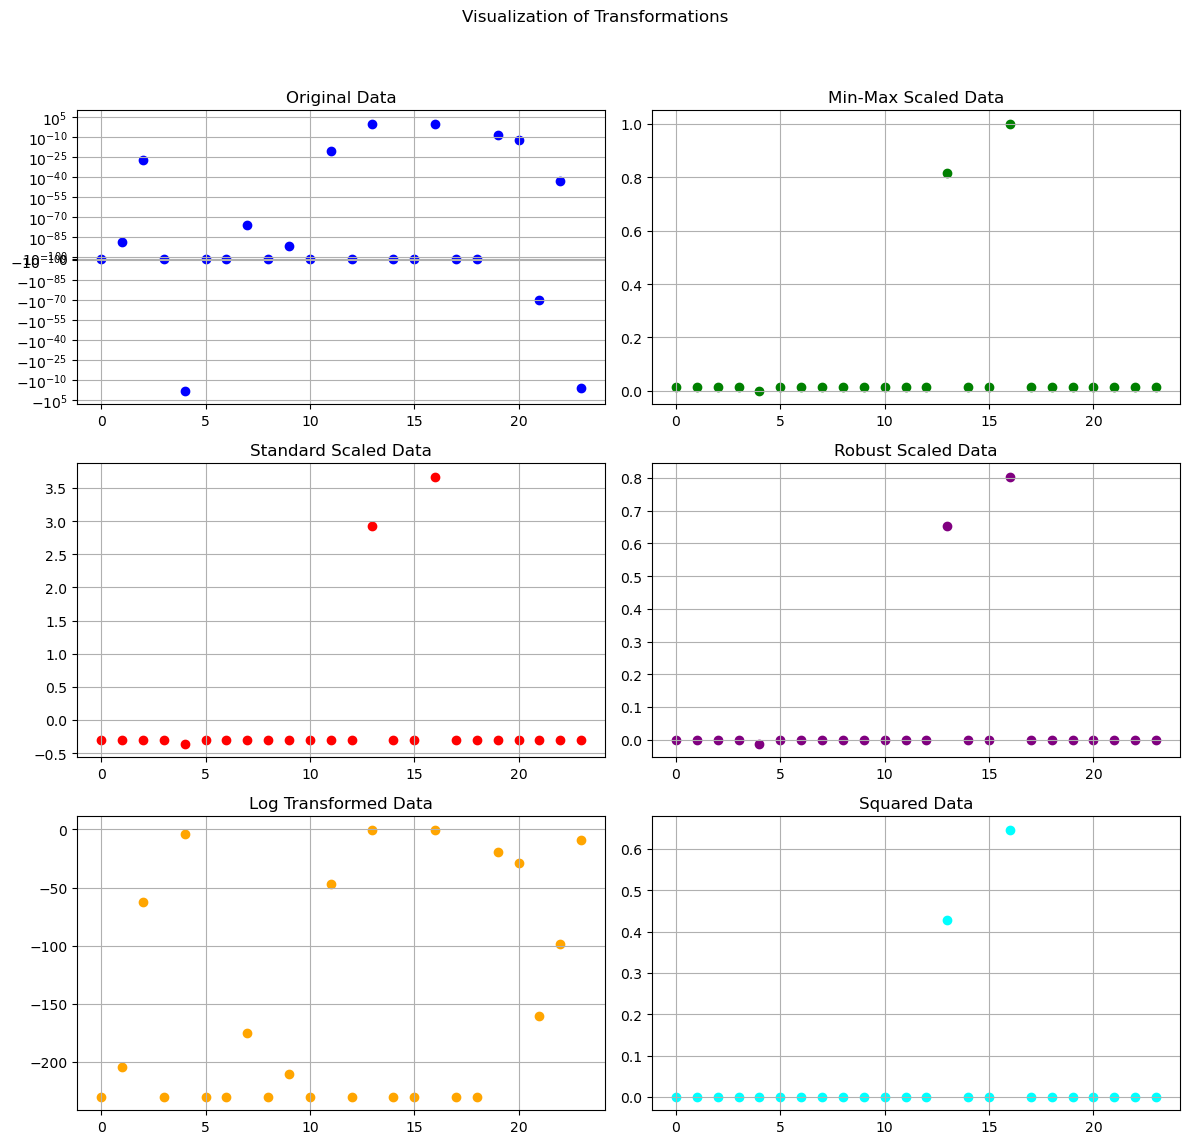

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import norm

# Applying various transformations
scaler_min_max = MinMaxScaler()
df['Min_Max_Scaled'] = scaler_min_max.fit_transform(df[['Output']])

scaler_standard = StandardScaler()
df['Standard_Scaled'] = scaler_standard.fit_transform(df[['Output']])

scaler_robust = RobustScaler()
df['Robust_Scaled'] = scaler_robust.fit_transform(df[['Output']])

# Log transformation with a small shift to handle zero and negative values
epsilon = 1e-100  # Small constant to avoid log(0)
df['Log_Transformed'] = np.log(df['Output'].abs() + epsilon)

# Square transformation
df['Squared'] = np.power(df['Output'], 2)

# Plotting the original and transformed data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Visualization of Transformations')

# Original Data
axes[0, 0].scatter(df.index, df['Output'], color='blue')
axes[0, 0].set_title('Original Data')
axes[0, 0].set_yscale('symlog', linthresh=epsilon)
axes[0, 0].grid(True)

# Min-Max Scaled Data
axes[0, 1].scatter(df.index, df['Min_Max_Scaled'], color='green')
axes[0, 1].set_title('Min-Max Scaled Data')
axes[0, 1].grid(True)

# Standard Scaled Data
axes[1, 0].scatter(df.index, df['Standard_Scaled'], color='red')
axes[1, 0].set_title('Standard Scaled Data')
axes[1, 0].grid(True)

# Robust Scaled Data
axes[1, 1].scatter(df.index, df['Robust_Scaled'], color='purple')
axes[1, 1].set_title('Robust Scaled Data')
axes[1, 1].grid(True)

# Log Transformed Data
axes[2, 0].scatter(df.index, df['Log_Transformed'], color='orange')
axes[2, 0].set_title('Log Transformed Data')
axes[2, 0].grid(True)

# Squared Data
axes[2, 1].scatter(df.index, df['Squared'], color='cyan')
axes[2, 1].set_title('Squared Data')
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Removing the outlier (negative 'large' value) para ver como se ven los datos

In [11]:
new_df_out=df[['Input_1','Input_2','Output']]
new_df_out=new_df_out.drop(index=4)
new_df_out

,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48
10,0.111111,0.111111,1.360000e-134


In [12]:
# Display basic statistics
print("Basic Statistical Summary:")
print(new_df_out.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(new_df_out.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2         Output
count  23.000000  23.000000   2.300000e+01
mean    0.517783   0.500582   2.327496e-03
std     0.284998   0.290350   7.783425e-03
min     0.050000   0.010000  -3.830298e-04
25%     0.356978   0.332366  2.203032e-291
50%     0.489179   0.502706   3.606771e-81
75%     0.707221   0.666522   3.855438e-16
max     0.990000   0.990000   2.835437e-02

Missing values in the dataset:
Input_1    0
Input_2    0
Output     0
dtype: int64


## Definir las variables

### Generar acquisition function, maximizar y encontrar el siguiente query

In [37]:
X=df[['Input_1','Input_2']]
y=df[['Output']]

#X=new_df_out[['Input_1','Input_2']]
#y=new_df_out['Output']



In [38]:
# Parameters of the model
#****************************************
noise_assumption = 1e-10 # noise assumption, a hyper-parameter (default 1e-10)

rbf_lengthscale = .15 # lengthscale parameter (default = 1), comenzaremos con 0.2 y luego ir descendiendo a 0.1 o menos
   #ARD. Automatic relevance determination. Numeros pequeños permiten mas ruido. MAs grande se suaviza. Tambien depende la escala del output. Numeros grandes deberia estar en 1
    
# define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')

# Define a kernel with both smooth and rough components, and noise handling
#kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=0.1) + RationalQuadratic(length_scale=1.0, alpha=0.1)
#kernel=kernel + WhiteKernel(noise_level=1e-5) #ESPECIAL PARA FUNCION 1 POR LAS ANOMALIAS
#kernel = Matern(length_scale=[0.1, 0.1, 0.1], nu=1.5, length_scale_bounds=(0.01, 1), ARD=True)

#Grid:
GG=300    #Numero de datos para cada variable en el Grid.  
dim=2     #Numero de Inputs
#******************************************************
x1 = np.linspace(0.0, 1.0, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables
# Convert X_grid into a DataFrame with meaningful names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)

# Fit the Gaussian process - Surrogate model
GPR_model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
GPR_model.fit(X, y)

#Genera la funcion del Surrogate model para cada punto del grid
mean, std = GPR_model.predict(X_grid_df, return_std = True)

In [39]:
#Acquisition function
#######################################################

beta = 1.6
acquisition_function = mean + beta * std

#######################################################

idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"[{formatted_row}]")

[0.364548-0.311037]


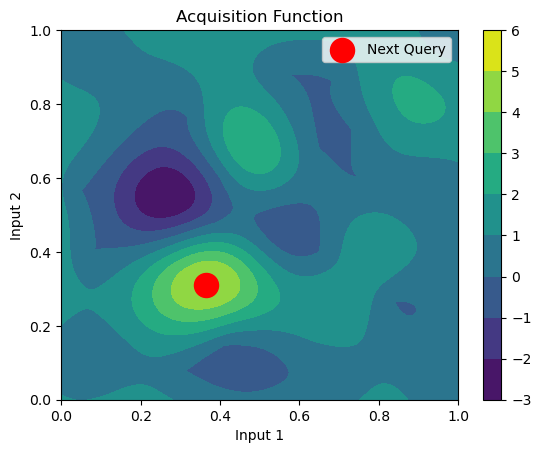

In [40]:
fig, ax = plt.subplots()
cp = ax.contourf(X_grid[:, 0].reshape(GG, GG), X_grid[:, 1].reshape(GG, GG), acquisition_function.reshape(GG, GG))
fig.colorbar(cp)  # Add a colorbar to a plot

# Plot the location of the next query
ax.scatter(next_query[0],next_query[1], color='red', s=300, label='Next Query')
ax.legend()
    
ax.set_title('Acquisition Function')
ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
plt.show()

In [41]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.0001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta casi CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################


Beta 1.96 [0.361204-0.311037]
Beta casi CERO [0.377926-0.317726]
Beta 2.6 [0.354515-0.307692]
ONLY std [0.311037-1.000000]


#### 28 Apr. Ask 1. [0.050000-0.950000]

- Casi todo me da explorar un query=(0,1) porque es area inexplorada

- Con lengthscale = 0.1, q:(0,1)
- Con Beta=0, q:(0.80-0,75), y hacia esa zona dependiendo de Beta

Con el rango en 0.1 y 0.9, me arroja ir hacia (0.4,0.46).......sin GRANDECIN esto es (0.51,0.47)
Con el rango en 0,6 y 0,8, me arroja ir hacia (0.75,0,60)

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.750000-0.600000]
- [0.050000-0.950000]

#### 10 may
- Explorando desde 0 hasta 1, todo normal. (1,0) o podria ser (1,1)....(0.92,0.81) con mucho ruido
- Con rango 0.6-0.8: (0.6,0.6) si manejamos el rango de 
- Si lo abro a 0.6-1, me sigue dando el 1,1
- [0.600000-0.600000]
- [0.990000-0.990000]
- [0.990000-0.010000]

#### 14may
Se alcanzo un nuevo maximo en 0.6,0.6 OJO CON ESTO. 
- LAs correlacionese cayeron significativamente. lo cual indica que son areas muy especificas donde hay informacion.
***
- Con todos los datos y distintos niveles de ruido y lenght ([0.676768-0.000000])
- Sin ruido me manda mas hacia el 0.5 (0.535354-0.515152]) y [0.454545-0.464646]
- Quitando la obervacion outlier negativa:
-   Beta casi CERO [0.444444-0.515152]
-   Beta 2.6 [0.666667-0.000000]
-   o tambien Beta casi CERO [0.535354-0.585859]

*** Cuando hago todo con la transformacion cuadratica
- Beta casi CERO [0.535354-0.515152]
- Beta 2.6 [0.434343-0.454545]
- ONLY std [0.676768-0.000000]
*** SIN OBSERVACION Itlier:
-  Beta casi CERO [0.535354-0.585859]
-  Beta 2.6 [0.414141-0.464646]
-  ONLY std [0.676768-0.000000]

***** Nos vamos a ir por  [0.434343-0.454545]***

#### 17 may
Se alcanzo nuevo maximo en ***
- De nuevo,con varias combinaciones me manda [0.676768-0.050000]
- Si me voy hacia Beta=0, sigue siendo hacia 0.47 y 0.55 de ambos lados, asi que mejor vemos la transformacion
*** Con transformacion quad: [0.505051-0.484848]
*** Con optimizador log [0.404041-0.464647], Beta 2.6 [0.000001-0.565656]
*** CONCLUSION. Tengo dos areas por explora para tener las dos fuentes: [0, 0,56] y [0.67,0]. y tambien tengo varios puntos alrededor del maximo.

******* Me voy por explorar y acotar las areas [0.676768-0.050000] y [0.050001-0.565656]

#### 1 Junio
 *** Loglikelihood normal
- Beta 1.96 [0.464647-0.474748]
- Beta casi CERO [0.474748-0.484849]
*** Loglikelihood con transformacion
Beta 1.96 [0.484849-0.484849]+
Beta 2.6 [0.484849-0.474748]
*** Con transformacion y sin outlier
- Beta 1.96 [0.595960-0.383838]
- Beta casi CERO [0.494949-0.525253]
- Beta 2.6 [0.595960-0.363636]
- ****** Voy por [0.484849-0.484849]

#### 7 jun
- * Transformo datos y log likelihood
- Beta 1.96 [0.484849-0.494950]
- * Log likelihood normal con datos escalados
- Beta 1.96 [0.434870-0.454910]
- Next query point EI: [0.649298-0.681362]
- * Log likelihood normal con datos escalados y sin outlier
- Beta 1.96 [0.498998-0.511022]
- en rango acotado Next query point EI: [0.649999-0.400001]++
- *** Sin outlier, tranformacion y loglikelihood con scaler
- Beta 1.96 [0.489179-0.502706]++
- Next query point EI: [0.649999-0.400001]++


- ****** Voy por [0.489179-0.502706] y [0.649999-0.400001]

#### 12 jun
- * Transformo datos y log likelihood con scaler (sin outlier es muy similar)
- Beta 1.96 [0.423047-0.447596]
- Beta casi CERO [0.433568-0.454109]
- Next query point EI: [0.509720-0.478658]
- Next query point PI: [0.484169-0.483668]

- * Transoformo datos y Log likelihood SIN scaler - En la grafica me gusta como se ve este.
- Beta 1.96 [0.477656-0.504209]
- Beta casi CERO [0.484670-0.506714]
- Next query point EI: [0.649999-0.649999]
- Next query point PI: [0.649999-0.649999]

- * NO Transformo, pero sí escalo. Log likelihood normal con datos escalados
- Beta 1.96 [0.422045-0.447596]
- Beta casi CERO [0.433568-0.454109]
- Next query point EI: [0.649999-0.649999]
- Next query point PI: [0.484169-0.483668]

- TORCH
- TS: [0.400150-0.600044] ++
- EI: [0.353403-0.997757]
- UCB: [0.394553-0.480802] +
- UCB-Z: [0.427731-0.489973]

- ****** Voy por [0.400150-0.600044] y [0.394553-0.480802]

#### 18 jun

- Normal scaler log likelihood
Beta 1.96 [0.439079-0.450602]
Beta casi CERO [0.434570-0.454610]
Beta 2.6 [0.442085-0.453107]
ONLY std [0.451604-0.649999]
Next query point EI: [0.473147-0.497195]
Next query point PI: [0.489179-0.502706]

- Transformacion, sin scaler y log likelihood
Beta 1.96 [0.495692-0.503708]
Beta casi CERO [0.498197-0.507215]
Beta 2.6 [0.494690-0.502205]
ONLY std [0.649999-0.400001]
Next query point EI: [0.649999-0.649999]
Next query point PI: [0.649999-0.649999]

- Nuevo modelo mas robusto
Next query point UCB with Beta 0.01: [0.434434-0.454454]
Next query point UCB with Beta 1.96: [0.438438-0.447447]
Next query point UCB with Beta 2.6: [0.439439-0.445445]
Next query point EI: [0.377377-0.491491]
Next query point PI: [0.050050-0.565566]

- *** VOY POR [0.377377-0.491491]como miercoles de exploracion

# New model

In [79]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data
df['transf_output'] = np.sign(df['Output']) * df['Output'] ** 2
df['transf_output_1000'] = df['transf_output'] * 1000
df['Output'] = df['transf_output_1000']

X = df[['Input_1', 'Input_2']].values
y = df[['Output']].values

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-1, name='length_scale'),
    Real(1e-12, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

# Define ranges for each input
input_ranges = [(0.30, 0.65), (0.30, 0.65)]  # Example ranges for two inputs

GG = 1000  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)
X_grid_scaled = scaler_X.transform(X_grid)  # Scale the grid points

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")


# Test different beta values for UCB and other acquisition functions
for beta in [0.01, 1.96, 2.6]:
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

# Use other acquisition functions
acquisition_function_ei = gaussian_ei(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_ei = np.argmax(acquisition_function_ei)
next_query_ei = X_grid[idx_max_ei]
formatted_row_ei = '-'.join(format(x, ".6f") for x in next_query_ei)
print(f"Next query point EI: [{formatted_row_ei}]")

acquisition_function_pi = gaussian_pi(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_pi = np.argmax(acquisition_function_pi)
next_query_pi = X_grid[idx_max_pi]
formatted_row_pi = '-'.join(format(x, ".6f") for x in next_query_pi)
print(f"Next query point PI: [{formatted_row_pi}]")

Best length scale: 0.06907321104333161
Best noise level: 1e-12
Next query point UCB with Beta 1.96: [0.439089-0.445746]
Next query point UCB with Beta 0.01: [0.434535-0.454154]
Next query point UCB with Beta 1.96: [0.439089-0.445746]
Next query point UCB with Beta 2.6: [0.439790-0.442943]
Next query point EI: [0.377778-0.491992]
Next query point PI: [0.393894-0.480781]


/Users/macponcho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


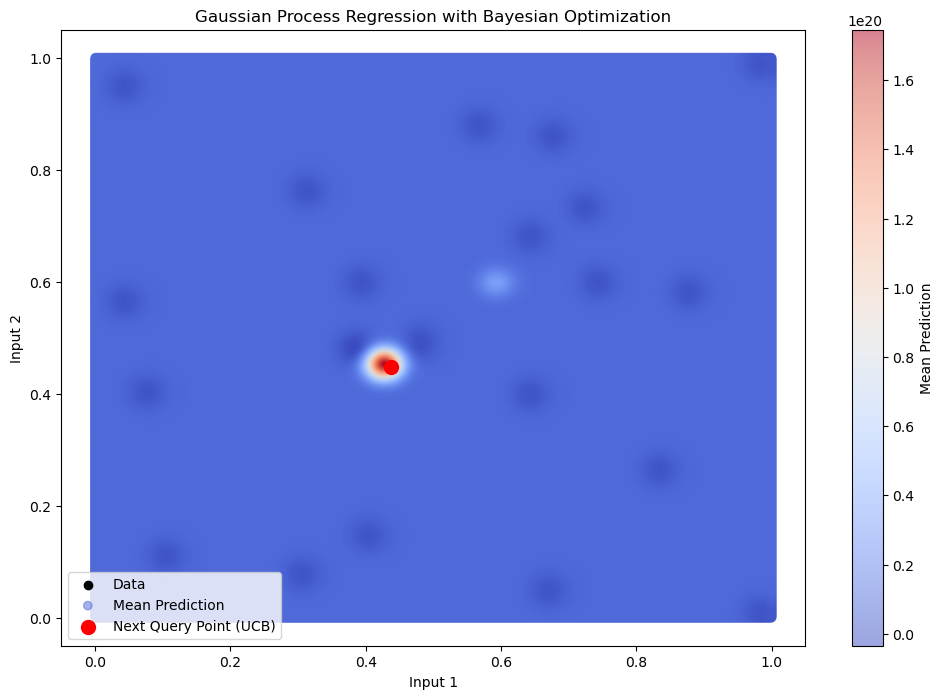

In [59]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='black', label='Data')
plt.scatter(X_grid[:, 0], X_grid[:, 1], c=mean, cmap='coolwarm', label='Mean Prediction', alpha=0.5)
plt.colorbar(label='Mean Prediction')
plt.scatter(next_query_ucb[0], next_query_ucb[1], color='red', s=100, label='Next Query Point (UCB)')
plt.title('Gaussian Process Regression with Bayesian Optimization')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()


In [73]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data
df['transf_output'] = np.sign(df['Output']) * df['Output'] ** 2
df['transf_output_1000'] = df['transf_output'] * 1000
df['Output'] = df['transf_output_1000']

X = df.drop(columns=['Output','transf_output','transf_output_1000'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-0, name='length_scale'),
    Real(1e-12, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999)  # Range for Input_2
    # Add more ranges for additional inputs if necessary
]

# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 100  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6], ['blue', 'green', 'purple'], ['x', 's', 'd']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

# Use other acquisition functions
acquisition_function_ei = gaussian_ei(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_ei = np.argmax(acquisition_function_ei)
next_query_ei = X_grid[idx_max_ei]
query_points.append((next_query_ei, 'EI', 'orange', 'v'))
formatted_row_ei = '-'.join(format(x, ".6f") for x in next_query_ei)
print(f"Next query point EI: [{formatted_row_ei}]")

acquisition_function_pi = gaussian_pi(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_pi = np.argmax(acquisition_function_pi)
next_query_pi = X_grid[idx_max_pi]
query_points.append((next_query_pi, 'PI', 'cyan', '^'))
formatted_row_pi = '-'.join(format(x, ".6f") for x in next_query_pi)
print(f"Next query point PI: [{formatted_row_pi}]")


Best length scale: 0.06907321104333161
Best noise level: 1e-12
Next query point UCB with Beta 1.96: [0.434344-0.444445]
Next query point UCB with Beta 0.01: [0.434344-0.454546]
Next query point UCB with Beta 1.0: [0.434344-0.444445]
Next query point UCB with Beta 2.6: [0.444445-0.444445]
Next query point EI: [0.373738-0.484849]
Next query point PI: [0.050506-0.565656]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


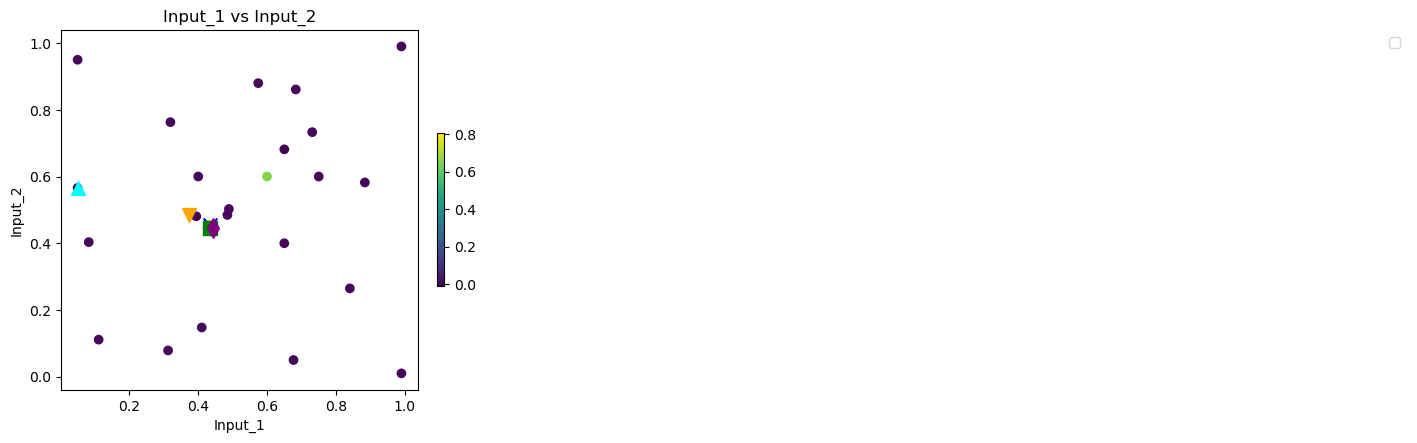

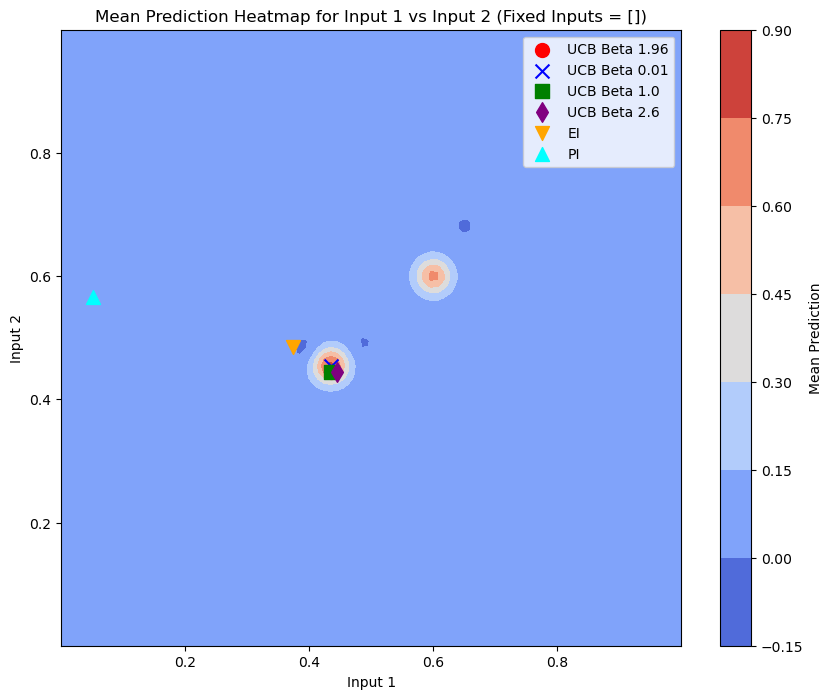

In [74]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)